<a href="https://colab.research.google.com/github/Shirou191/A-Hybrid-CNN-LSTM-Approach-for-Intelligent-Cyber-Intrusion-Detection-System/blob/main/Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [1]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from sklearn.decomposition import PCA

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from sklearn.utils import shuffle

np.random.seed(1635848)

In [2]:
# fetch the training file
file_path_full_training_set = 'KDDTrain+.txt'
file_path_test = 'KDDTest+.txt'

In [3]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

# Pass header=None to treat the first row as data
# Pass names=columns to automatically split and name the columns
df = pd.read_csv(file_path_full_training_set, header=None, names=columns)
test_df = pd.read_csv(file_path_test, header=None, names=columns)

# Verify the fix
print("Train shape:", df.shape)  # Should show 43 columns
print("Test shape:", test_df.shape)

Train shape: (125973, 43)
Test shape: (22544, 43)


In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df.columns = columns
test_df.columns = columns

In [6]:
df.shape

(125973, 43)

In [7]:
test_df.shape

(22544, 43)

In [8]:
pd.set_option('display.max_columns', 43)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [10]:
test_df.shape

(22544, 43)

In [11]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


In [13]:
pd.set_option('display.max_rows', 23)
print('Label distribution Training set:')
print(df['attack'].value_counts())

Label distribution Training set:
attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [14]:
print('Label distribution Test set:')
print(test_df['attack'].value_counts())

Label distribution Test set:
attack
normal          9711
neptune         4657
guess_passwd    1231
mscan            996
warezmaster      944
                ... 
perl               2
sqlattack          2
udpstorm           2
phf                2
imap               1
Name: count, Length: 38, dtype: int64


In [15]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [16]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack' has 38 categories


In [17]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [18]:
# # protocol type
# unique_protocol=sorted(df.protocol_type.unique())
# string1 = 'Protocol_type_'
# unique_protocol2=[string1 + x for x in unique_protocol]
# # service
# unique_service=sorted(df.service.unique())
# string2 = 'service_'
# unique_service2=[string2 + x for x in unique_service]
# # flag
# unique_flag=sorted(df.flag.unique())
# string3 = 'flag_'
# unique_flag2=[string3 + x for x in unique_flag]
# # put together
# dumcols=unique_protocol2 + unique_service2 + unique_flag2
# print(dumcols)

# #do same for test set
# unique_service_test=sorted(test_df.service.unique())
# unique_service2_test=[string2 + x for x in unique_service_test]
# testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


# protocol type
unique_protocol = sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
# convert x to string using str(x)
unique_protocol2 = [string1 + str(x) for x in unique_protocol]

# service
unique_service = sorted(df.service.unique())
string2 = 'service_'
unique_service2 = [string2 + str(x) for x in unique_service]

# flag
unique_flag = sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + str(x) for x in unique_flag]

# put together
dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

unique_service_test=sorted(test_df.service.unique())
unique_service2_test=[string2 + str(x) for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [19]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [20]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
trainservice=df['service'].tolist()
testservice= test_df['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + str(x) for x in difference]
difference

['service_http_2784',
 'service_harvest',
 'service_urh_i',
 'service_red_i',
 'service_aol',
 'service_http_8001']

In [22]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [23]:

newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 124)
(22544, 124)


In [24]:
newdf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# take label column
labeldf=newdf['attack']
labeldf_test=newdf_test['attack']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['attack'] = newlabeldf
newdf_test['attack'] = newlabeldf_test
print(newdf['attack'].head())

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64


/tmp/ipython-input-3327160078.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
/tmp/ipython-input-3327160078.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstor

In [26]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 124)
Dimensions of Probe: (78999, 124)
Dimensions of R2L: (68338, 124)
Dimensions of U2R: (67395, 124)
Test:
Dimensions of DoS: (17171, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


In [27]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('attack',axis=1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack',axis=1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack',axis=1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack',axis=1)
Y_U2R = U2R_df.attack
# test set
X_DoS_test = DoS_df_test.drop('attack',axis=1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack',axis=1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack',axis=1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack',axis=1)
Y_U2R_test = U2R_df_test.attack

In [28]:
X_DoS.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
p = X_DoS.columns

In [30]:
Y_DoS.shape

(113270,)

In [31]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [32]:
len(colNames_test)

123

In [33]:
len(colNames)

123

In [34]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [35]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


In [36]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

In [37]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 16  45  64  67  69  87 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(113270, 13)

In [38]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [39]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78999, 13)

In [40]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [41]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  77  78  79  80  81  82  83  84  87  88  90  93
  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68338, 13)

In [42]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [43]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  76  77  78  79  80  81  82  83  84  87  88  90
  93  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67395, 13)

In [44]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp_data',
 'service_http',
 'service_telnet']

In [45]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rat

In [46]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(np.int64(1), 'same_srv_rate'), (np.int64(2), 'count'), (np.int64(3), 'flag_SF'), (np.int64(4), 'dst_host_serror_rate'), (np.int64(5), 'dst_host_same_srv_rate'), (np.int64(6), 'dst_host_srv_count'), (np.int64(7), 'dst_host_count'), (np.int64(8), 'logged_in'), (np.int64(9), 'serror_rate'), (np.int64(10), 'dst_host_srv_serror_rate'), (np.int64(11), 'srv_serror_rate'), (np.int64(12), 'service_http'), (np.int64(13), 'flag_S0')]


In [47]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(np.int64(1), 'level'), (np.int64(2), 'dst_host_diff_srv_rate'), (np.int64(3), 'service_private'), (np.int64(4), 'dst_host_srv_count'), (np.int64(5), 'logged_in'), (np.int64(6), 'dst_host_rerror_rate'), (np.int64(7), 'dst_host_same_src_port_rate'), (np.int64(8), 'service_eco_i'), (np.int64(9), 'flag_SF'), (np.int64(10), 'rerror_rate'), (np.int64(11), 'dst_host_srv_rerror_rate'), (np.int64(12), 'Protocol_type_icmp'), (np.int64(13), 'srv_rerror_rate')]


In [48]:
rfe.fit(X_newR2L, Y_R2L)

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(np.int64(1), 'level'), (np.int64(2), 'dst_host_srv_diff_host_rate'), (np.int64(3), 'dst_host_same_src_port_rate'), (np.int64(4), 'hot'), (np.int64(5), 'service_ftp_data'), (np.int64(6), 'dst_host_srv_count'), (np.int64(7), 'dst_bytes'), (np.int64(8), 'service_imap4'), (np.int64(9), 'num_failed_logins'), (np.int64(10), 'is_guest_login'), (np.int64(11), 'service_ftp'), (np.int64(12), 'service_http'), (np.int64(13), 'flag_RSTO')]


In [49]:
rfe.fit(X_newU2R, Y_U2R)

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(np.int64(1), 'level'), (np.int64(2), 'dst_host_srv_count'), (np.int64(3), 'hot'), (np.int64(4), 'num_file_creations'), (np.int64(5), 'dst_host_count'), (np.int64(6), 'service_ftp_data'), (np.int64(7), 'dst_host_srv_diff_host_rate'), (np.int64(8), 'dst_host_same_src_port_rate'), (np.int64(9), 'service_telnet'), (np.int64(10), 'service_http'), (np.int64(11), 'num_shells'), (np.int64(12), 'root_shell'), (np.int64(13), 'urgent')]


In [50]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [51]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(np.int64(1), 'Protocol_type_icmp'), (np.int64(1), 'dst_host_diff_srv_rate'), (np.int64(1), 'dst_host_rerror_rate'), (np.int64(1), 'dst_host_same_src_port_rate'), (np.int64(1), 'dst_host_srv_count'), (np.int64(1), 'dst_host_srv_rerror_rate'), (np.int64(1), 'flag_SF'), (np.int64(1), 'level'), (np.int64(1), 'logged_in'), (np.int64(1), 'rerror_rate'), (np.int64(1), 'service_eco_i'), (np.int64(1), 'service_private'), (np.int64(1), 'srv_rerror_rate')]


In [52]:
rfe.fit(X_newR2L, Y_R2L)

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(np.int64(1), 'dst_bytes'), (np.int64(1), 'dst_host_same_src_port_rate'), (np.int64(1), 'dst_host_srv_count'), (np.int64(1), 'dst_host_srv_diff_host_rate'), (np.int64(1), 'flag_RSTO'), (np.int64(1), 'hot'), (np.int64(1), 'is_guest_login'), (np.int64(1), 'level'), (np.int64(1), 'num_failed_logins'), (np.int64(1), 'service_ftp'), (np.int64(1), 'service_ftp_data'), (np.int64(1), 'service_http'), (np.int64(1), 'service_imap4')]


In [53]:
rfe.fit(X_newU2R, Y_U2R)

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(np.int64(1), 'dst_host_count'), (np.int64(1), 'dst_host_same_src_port_rate'), (np.int64(1), 'dst_host_srv_count'), (np.int64(1), 'dst_host_srv_diff_host_rate'), (np.int64(1), 'hot'), (np.int64(1), 'level'), (np.int64(1), 'num_file_creations'), (np.int64(1), 'num_shells'), (np.int64(1), 'root_shell'), (np.int64(1), 'service_ftp_data'), (np.int64(1), 'service_http'), (np.int64(1), 'service_telnet'), (np.int64(1), 'urgent')]


In [54]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [55]:
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [56]:
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [57]:
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [58]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'count', 'serror_rate', 'same_srv_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level', 'service_X11', 'service_ecr_i', 'service_ftp_data']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'level', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'num_root', 'serror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'level', 'service_ftp_data']

Features selected for U2R: ['dst_bytes', 'srv_count', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp_data', 'service_other', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']


In [59]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


In [60]:
Y_DoS.shape

(113270,)

In [61]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [62]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [63]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.4 MB/s eta 0:00:00


In [64]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9454,257
1,1667,5793


In [65]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,2861,6850
2,164,2257


In [66]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9692,19
3,2875,10


In [67]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99738 (+/- 0.00251)
Precision: 0.99626 (+/- 0.00392)
Recall: 0.99772 (+/- 0.00433)
F-measure: 0.99699 (+/- 0.00289)


In [69]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99769 (+/- 0.00178)
Precision: 0.99655 (+/- 0.00410)
Recall: 0.99623 (+/- 0.00222)
F-measure: 0.99639 (+/- 0.00277)


In [70]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99714 (+/- 0.00286)
Precision: 0.99537 (+/- 0.00413)
Recall: 0.99656 (+/- 0.00488)
F-measure: 0.99596 (+/- 0.00404)


In [71]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00333)
Precision: 0.93886 (+/- 0.11895)
Recall: 0.95549 (+/- 0.14716)
F-measure: 0.94502 (+/- 0.12321)


In [72]:
%matplotlib inline

Automatically created module for IPython interactive environment


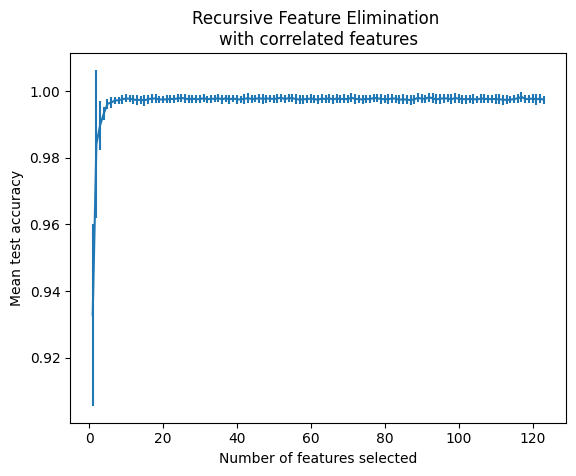

In [73]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_DoS = RFECV(estimator=clf_DoS, step=1, cv=10, scoring='accuracy')
rfecv_DoS.fit(X_DoS_test, Y_DoS_test)

n_scores = len(rfecv_DoS.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_DoS.cv_results_["mean_test_score"],
    yerr=rfecv_DoS.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

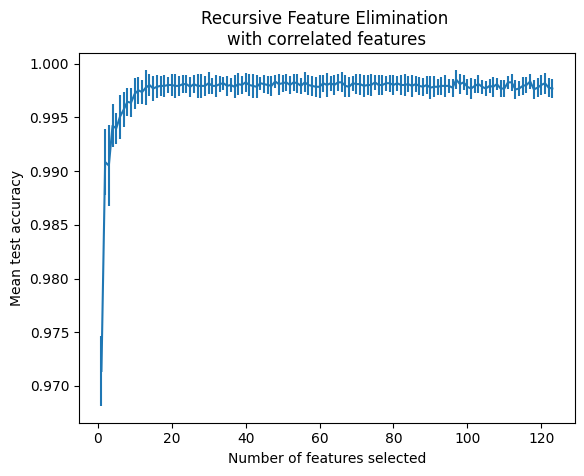

In [74]:
rfecv_Probe = RFECV(estimator=clf_Probe, step=1, cv=10, scoring='accuracy')
rfecv_Probe.fit(X_Probe_test, Y_Probe_test)
# Plot number of features VS. cross-validation scores
n_scores = len(rfecv_Probe.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_Probe.cv_results_["mean_test_score"],
    yerr=rfecv_Probe.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

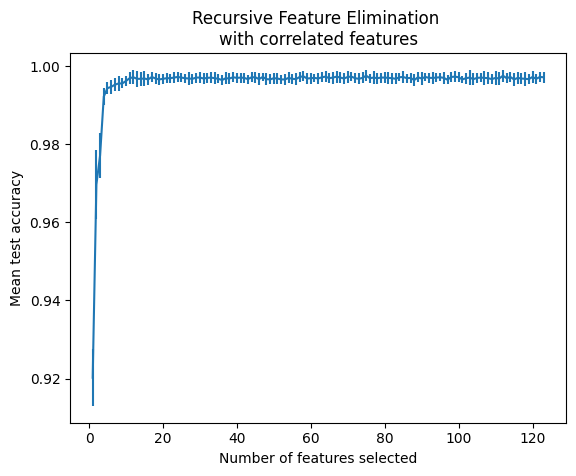

In [75]:
rfecv_R2L = RFECV(estimator=clf_R2L, step=1, cv=10, scoring='accuracy')
rfecv_R2L.fit(X_R2L_test, Y_R2L_test)
# Plot number of features VS. cross-validation scores
n_scores = len(rfecv_R2L.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_R2L.cv_results_["mean_test_score"],
    yerr=rfecv_R2L.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

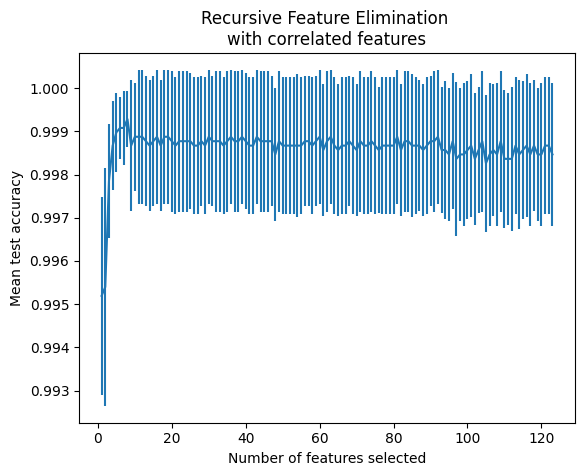

In [76]:
rfecv_U2R = RFECV(estimator=clf_U2R, step=1, cv=10, scoring='accuracy')
rfecv_U2R.fit(X_U2R_test, Y_U2R_test)
n_scores = len(rfecv_U2R.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_U2R.cv_results_["mean_test_score"],
    yerr=rfecv_U2R.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [77]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

In [78]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9363,348
1,1496,5964


In [79]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8644,1067
2,818,1603


In [80]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2875,10


In [81]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [82]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99808 (+/- 0.00173)
Precision: 0.99719 (+/- 0.00252)
Recall: 0.99839 (+/- 0.00201)
F-measure: 0.99779 (+/- 0.00199)


In [83]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99580 (+/- 0.00290)
Precision: 0.99308 (+/- 0.00652)
Recall: 0.99381 (+/- 0.00500)
F-measure: 0.99343 (+/- 0.00453)


In [84]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)
Precision: 0.99001 (+/- 0.00583)
Recall: 0.99023 (+/- 0.00657)
F-measure: 0.99011 (+/- 0.00530)


In [85]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99816 (+/- 0.00220)
Precision: 0.93497 (+/- 0.09060)
Recall: 0.93168 (+/- 0.10875)
F-measure: 0.93165 (+/- 0.08622)


In [86]:
from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99808 (+/- 0.00173)


In [87]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99580 (+/- 0.00290)


In [88]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)


In [89]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99816 (+/- 0.00220)


CV DOS

In [90]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99651 (+/- 0.00023)


In [91]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99761 (+/- 0.00119)


In [92]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99808 (+/- 0.00173)


In [93]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99796 (+/- 0.00314)


In [94]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99779 (+/- 0.00566)


CV Probe

In [95]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99431 (+/- 0.00445)


In [96]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99604 (+/- 0.00298)


In [97]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99580 (+/- 0.00290)


In [98]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99637 (+/- 0.00473)


In [99]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99637 (+/- 0.00731)


# CV R2L

In [100]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99095 (+/- 0.00191)


In [101]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99270 (+/- 0.00217)


In [102]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)


In [103]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99325 (+/- 0.00977)


In [104]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99365 (+/- 0.00940)


CV U2R

In [105]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99744 (+/- 0.00061)


In [106]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99826 (+/- 0.00104)


In [107]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99816 (+/- 0.00220)


In [108]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99826 (+/- 0.00378)


In [109]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99836 (+/- 0.00519)


ANN without ref

In [110]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.python.keras import regularizers

In [111]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/ANN1_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [112]:
import tensorflow as tf

In [114]:
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

ann = Sequential()
ann.add(Dense(units=256, input_dim=123, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
ann.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [117]:
from tensorflow.keras.callbacks import EarlyStopping
model=ann.fit(X_DoS, Y_DoS,batch_size = 250, validation_data=(X_DoS_test, Y_DoS_test),epochs =50,callbacks = [my_callbacks])

Epoch 1/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9463 - loss: 0.1862
Epoch 1: val_accuracy improved from -inf to 0.92138, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9463 - loss: 0.1860 - val_accuracy: 0.9214 - val_loss: 0.3514
Epoch 2/50
443/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0440
Epoch 2: val_accuracy improved from 0.92138 to 0.93151, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0439 - val_accuracy: 0.9315 - val_loss: 0.3887
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0342
Epoch 3: val_accuracy did not improve from 0.93151
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9987 - loss: 0.0342 - val_accuracy: 0.9078 - val_loss: 0.3883
Epoch 4/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0278
Epoch 4: val_accuracy did not improve from 0.93151
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9986 - loss: 0.0278 - val_accuracy: 0.9297 - val_loss: 0.3060
Epoch 5/50
442/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0228
Epoch 5: val_accuracy improved from 0.93151 to 0.94287, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9985 - loss: 0.0227 - val_accuracy: 0.9429 - val_loss: 0.2973
Epoch 6/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0180
Epoch 6: val_accuracy improved from 0.94287 to 0.94380, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9987 - loss: 0.0180 - val_accuracy: 0.9438 - val_loss: 0.3303
Epoch 7/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0155
Epoch 7: val_accuracy did not improve from 0.94380
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9989 - loss: 0.0155 - val_accuracy: 0.9383 - val_loss: 0.3618
Epoch 8/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0130
Epoch 8: val_accuracy did not improve from 0.94380
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9990 - loss: 0.0130 - val_accuracy: 0.9387 - val_loss: 0.3527
Epoch 9/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0116
Epoch 9: val_accuracy did not improve from 0.94380
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9987 - loss: 0.0116 - val_accuracy: 0.9043 - val_loss: 0.6259
Epoch 10/50
440/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0117
Epoch 10: val_accuracy did not imp

454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9990 - loss: 0.0088 - val_accuracy: 0.9477 - val_loss: 0.3697
Epoch 13/50
439/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0150
Epoch 13: val_accuracy did not improve from 0.94770
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9983 - loss: 0.0149 - val_accuracy: 0.9357 - val_loss: 0.3738
Epoch 14/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0098
Epoch 14: val_accuracy did not improve from 0.94770
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9991 - loss: 0.0098 - val_accuracy: 0.9238 - val_loss: 0.4652
Epoch 15/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0089
Epoch 15: val_accuracy improved from 0.94770 to 0.94852, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9991 - loss: 0.0089 - val_accuracy: 0.9485 - val_loss: 0.3192
Epoch 16/50
438/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0088
Epoch 16: val_accuracy improved from 0.94852 to 0.94875, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9991 - loss: 0.0088 - val_accuracy: 0.9488 - val_loss: 0.3211
Epoch 17/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0096
Epoch 17: val_accuracy did not improve from 0.94875
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9986 - loss: 0.0096 - val_accuracy: 0.9038 - val_loss: 0.6172
Epoch 18/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0094
Epoch 18: val_accuracy improved from 0.94875 to 0.94962, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9990 - loss: 0.0094 - val_accuracy: 0.9496 - val_loss: 0.2680
Epoch 19/50
442/454 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0120
Epoch 19: val_accuracy did not improve from 0.94962
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9982 - loss: 0.0120 - val_accuracy: 0.9264 - val_loss: 0.4560
Epoch 20/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0096
Epoch 20: val_accuracy did not improve from 0.94962
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0096 - val_accuracy: 0.9436 - val_loss: 0.3555
Epoch 21/50
437/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0081
Epoch 21: val_accuracy did not improve from 0.94962
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0081 - val_accuracy: 0.9127 - val_loss: 0.5383
Epoch 22/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0078
Epoch 22: val_accuracy did n

In [118]:
y_pred = ann.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [119]:
y_pred

array([[9.9991846e-01],
       [9.9980831e-01],
       [3.3199249e-05],
       ...,
       [1.1618737e-04],
       [9.3843985e-01],
       [3.0522694e-06]], dtype=float32)

In [120]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [121]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [122]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      9711
           1       0.99      0.81      0.89      7460

    accuracy                           0.91     17171
   macro avg       0.93      0.90      0.91     17171
weighted avg       0.92      0.91      0.91     17171



ANN with Ref

In [123]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/ANN1ref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [124]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [125]:
X_rfeDoS.shape

(113270, 13)

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Create a Sequential model
ann = Sequential()

# Add layers to the model with the specified configurations
ann.add(Dense(units=256, input_dim=13, activation='relu', kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
# ann.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))
# ann.add(Dropout(0.3))
# ann.add(BatchNormalization())
ann.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
# ann.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
# ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=1, activation='sigmoid'))

# Your model is now defined with the desired layers and configurations.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
ann.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [128]:
from tensorflow.keras.callbacks import EarlyStopping
model=ann.fit(X_rfeDoS, Y_DoS,batch_size = 64, validation_data=(X_DoS_test2, Y_DoS_test),epochs =50,callbacks = [my_callbacks])

Epoch 1/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9762 - loss: 0.1450
Epoch 1: val_accuracy improved from -inf to 0.87007, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9762 - loss: 0.1450 - val_accuracy: 0.8701 - val_loss: 0.6260
Epoch 2/50
1760/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9959 - loss: 0.0291
Epoch 2: val_accuracy improved from 0.87007 to 0.89826, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0291 - val_accuracy: 0.8983 - val_loss: 0.7707
Epoch 3/50
1766/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0247
Epoch 3: val_accuracy did not improve from 0.89826
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0247 - val_accuracy: 0.8782 - val_loss: 0.7348
Epoch 4/50
1758/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9958 - loss: 0.0232
Epoch 4: val_accuracy did not improve from 0.89826
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0232 - val_accuracy: 0.8771 - val_loss: 0.6566
Epoch 5/50
1764/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0222
Epoch 5: val_accuracy did not improve from 0.89826
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0222 - val_accuracy: 0.8599 - val_loss: 0.7616
Epoch 6/50
1756/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0215
Epoch 6: val_accura

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0189 - val_accuracy: 0.9119 - val_loss: 0.8298
Epoch 8/50
1749/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0186
Epoch 8: val_accuracy did not improve from 0.91194
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0186 - val_accuracy: 0.8807 - val_loss: 0.8112
Epoch 9/50
1756/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0183
Epoch 9: val_accuracy did not improve from 0.91194
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0183 - val_accuracy: 0.8884 - val_loss: 0.7309
Epoch 10/50
1767/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0196
Epoch 10: val_accuracy did not improve from 0.91194
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9961 - loss: 0.0196 - val_accuracy: 0.8543 - val_loss: 0.8509
Epoch 11/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0176
Epoch 11: val_ac

In [129]:
y_pred = ann.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [130]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [131]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [132]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      9711
           1       0.99      0.78      0.87      7460

    accuracy                           0.90     17171
   macro avg       0.92      0.89      0.90     17171
weighted avg       0.91      0.90      0.90     17171



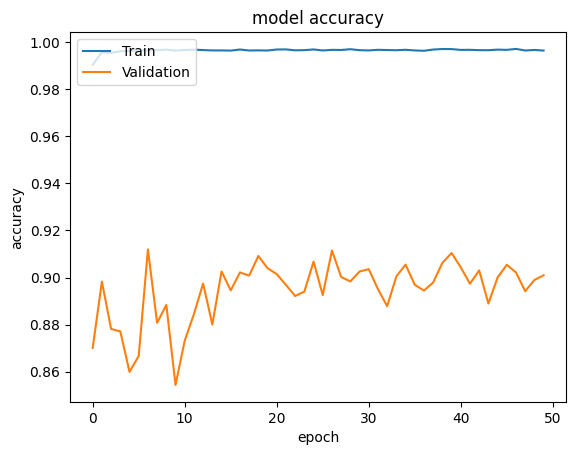

In [133]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withoutref.png')
plt.show()


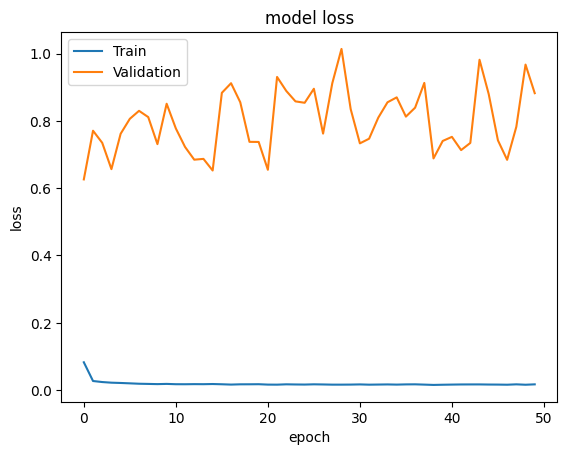

In [134]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withoutref.png')
plt.show()

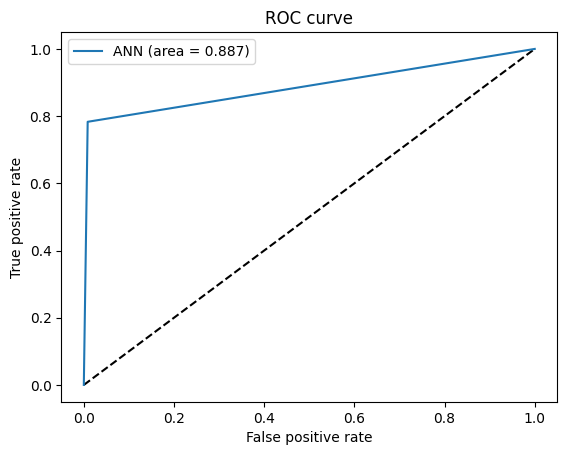

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN (area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

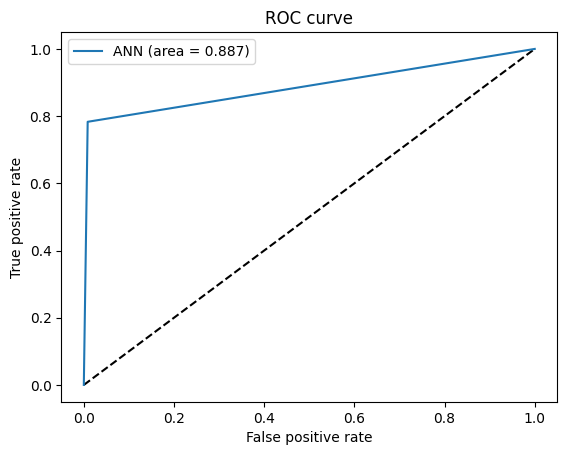

In [136]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN (area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

LSTM-CNN Without ref

In [137]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [138]:
Y_DoS = np.array(Y_DoS)

In [139]:
Y_DoS_test = np.array(Y_DoS_test)

In [140]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [141]:
# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

In [142]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/cnnlstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]

In [143]:
# from keras.callbacks import ModelCheckpoint
# my_callbacks = [
#     ModelCheckpoint(filepath='/content/drive/MyDrive/check/cnnlstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
# ]

In [144]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from keras.regularizers import l2

# model = Sequential() # initializing model

# # cnn-lstm
# model.add(Conv1D(64, 3, padding="same", input_shape=(X_DoS.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))  # Add dropout to reduce overfitting
# model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_DoS, Y_DoS, epochs=50, batch_size=64, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


# Initialize the model
model = Sequential()

# Add Convolutional and MaxPooling Layers with L2 Regularization
model.add(Conv1D(64, 3, padding="same", input_shape=(X_DoS.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

# Add Batch Normalization
model.add(BatchNormalization())

# Add LSTM layer with L2 Regularization
model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting

# Add Dense layer with L2 Regularization
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model with a custom learning rate schedule
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
history = model.fit(X_DoS, Y_DoS, epochs=50, batch_size=64, validation_data=(X_DoS_test, Y_DoS_test), callbacks=my_callbacks)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9798 - loss: 0.5128
Epoch 1: val_accuracy improved from -inf to 0.56922, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9798 - loss: 0.5127 - val_accuracy: 0.5692 - val_loss: 2.5115 - learning_rate: 0.0010
Epoch 2/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9949 - loss: 0.0681
Epoch 2: val_accuracy improved from 0.56922 to 0.92062, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9949 - loss: 0.0681 - val_accuracy: 0.9206 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 3/50
1765/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9894 - loss: 0.0892
Epoch 3: val_accuracy did not improve from 0.92062
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9895 - loss: 0.0892 - val_accuracy: 0.8965 - val_loss: 0.4069 - learning_rate: 0.0010
Epoch 4/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.0468
Epoch 4: val_accuracy did not improve from 0.92062
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9968 - loss: 0.0468 - val_accuracy: 0.5655 - val_loss: 2.4381 - learning_rate: 0.0010
Epoch 5/50
1765/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9971 - loss: 0.0378
Epoch 5: val_accuracy improved from 0.92062 to 0.92633, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9971 - loss: 0.0378 - val_accuracy: 0.9263 - val_loss: 0.2754 - learning_rate: 0.0010
Epoch 6/50
1769/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9971 - loss: 0.0366
Epoch 6: val_accuracy did not improve from 0.92633
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9971 - loss: 0.0366 - val_accuracy: 0.8974 - val_loss: 0.6041 - learning_rate: 0.0010
Epoch 7/50
1766/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9965 - loss: 0.0382
Epoch 7: val_accuracy did not improve from 0.92633
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9965 - loss: 0.0382 - val_accuracy: 0.5647 - val_loss: 3.0596 - learning_rate: 0.0010
Epoch 8/50
1766/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9974 - loss: 0.0321
Epoch 8: val_accuracy did not improve from 0.92633
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9974 - loss: 0.0321 - val_accuracy: 0.5643 - val_loss: 2.6099 - learning_rate: 0.0010
Ep

In [145]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/check/cnnlstmk_intrusion.h5')

In [146]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [147]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [148]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [149]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9711
           1       0.94      0.89      0.91      7460

    accuracy                           0.93     17171
   macro avg       0.93      0.92      0.92     17171
weighted avg       0.93      0.93      0.93     17171



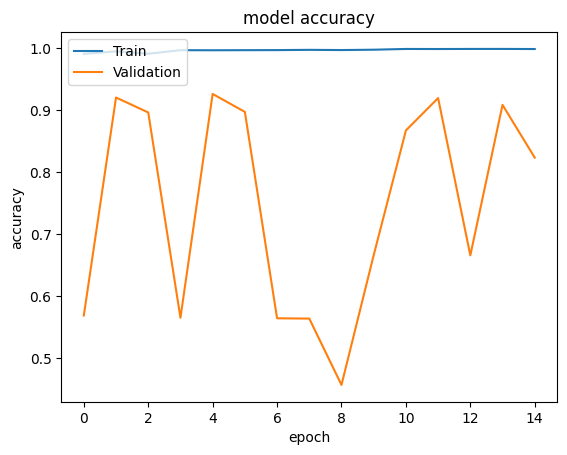

In [150]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withoutref.png')
plt.show()


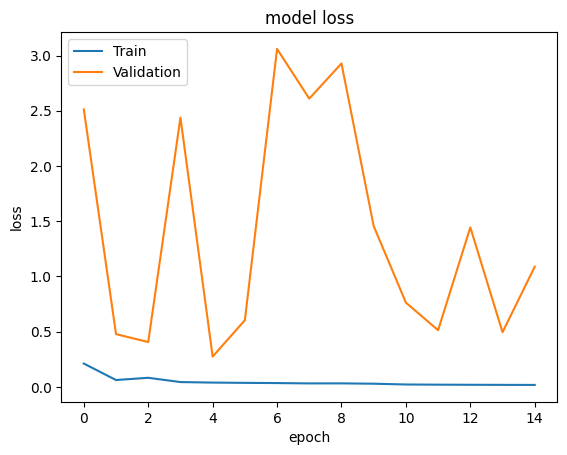

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withoutref.png')
plt.show()

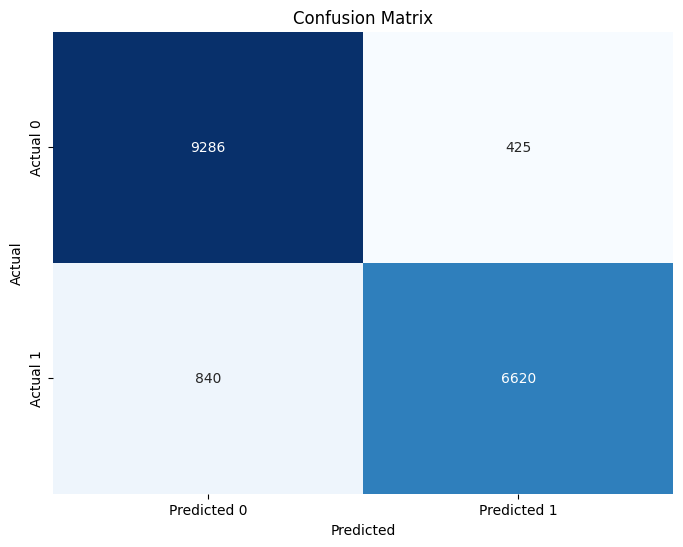

In [152]:
from matplotlib import pylab
from pylab import *
cm = confusion_matrix(Y_DoS_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('heatmap_withoutref.png')
plt.show()

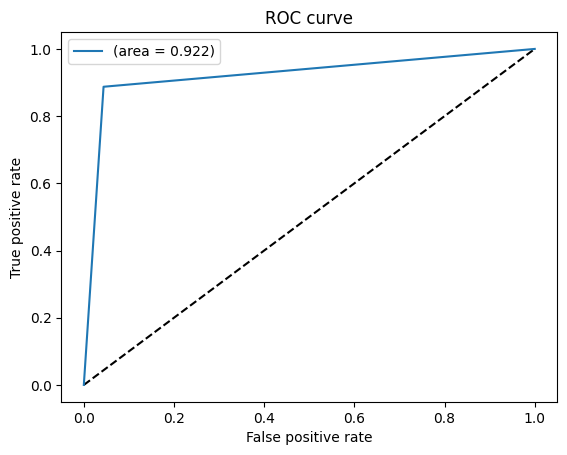

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_withoutref.png')
plt.show()

LSTM-CNN With ref

In [154]:
X_rfeDoS.shape

(113270, 13)

In [155]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [156]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))


In [157]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]

In [158]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define a learning rate schedule
initial_learning_rate = 0.001

# Initialize the model
model = Sequential()

input_shape = (X_rfeDoS.shape[1], 1)

# Convolutional layers
model.add(Conv1D(64, 3, padding="same", input_shape=input_shape, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 3, padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

# LSTM layer
# model.add(GRU(units=150, return_sequences=False, dropout=0.25, recurrent_dropout=0.25))
model.add(LSTM(units=150, dropout=0.2, return_sequences=False))

# Dense layer
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
# callbacks_list = [early_stopping, reduce_lr]

# Train the model
history = model.fit(X_rfeDoS, Y_DoS, epochs=100, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=my_callbacks)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9702 - loss: 0.1012
Epoch 1: val_accuracy improved from -inf to 0.89080, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9702 - loss: 0.1011 - val_accuracy: 0.8908 - val_loss: 0.5063 - learning_rate: 0.0010
Epoch 2/100
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9955 - loss: 0.0200
Epoch 2: val_accuracy improved from 0.89080 to 0.90379, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9955 - loss: 0.0200 - val_accuracy: 0.9038 - val_loss: 0.5041 - learning_rate: 0.0010
Epoch 3/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9969 - loss: 0.0160
Epoch 3: val_accuracy improved from 0.90379 to 0.90548, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9969 - loss: 0.0160 - val_accuracy: 0.9055 - val_loss: 0.5271 - learning_rate: 0.0010
Epoch 4/100
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9966 - loss: 0.0155
Epoch 4: val_accuracy did not improve from 0.90548
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9966 - loss: 0.0154 - val_accuracy: 0.9033 - val_loss: 0.5443 - learning_rate: 0.0010
Epoch 5/100
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9974 - loss: 0.0137
Epoch 5: val_accuracy did not improve from 0.90548
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9974 - loss: 0.0137 - val_accuracy: 0.9033 - val_loss: 0.5591 - learning_rate: 0.0010
Epoch 6/100
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9978 - loss: 0.0127
Epoch 6: val_accuracy did not improve from 0.90548
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9978 - loss: 0.0127 - val_accuracy: 0.9010 - val_loss: 0.5454 - learning_rate: 0.0010
Epoch 7/100
451

In [159]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5')

In [160]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [161]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [162]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [163]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      9711
           1       0.99      0.79      0.88      7460

    accuracy                           0.91     17171
   macro avg       0.92      0.89      0.90     17171
weighted avg       0.92      0.91      0.90     17171



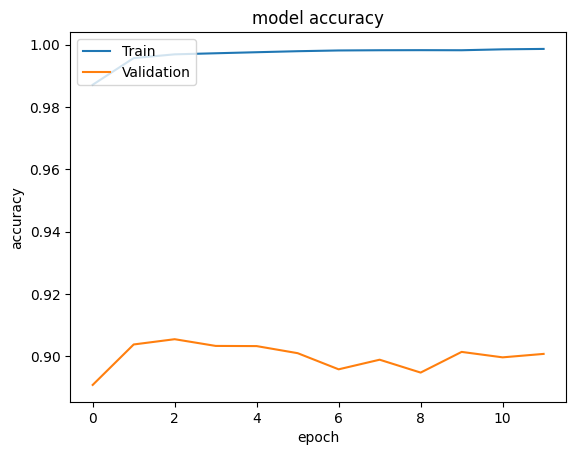

In [164]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withref.png')
plt.show()


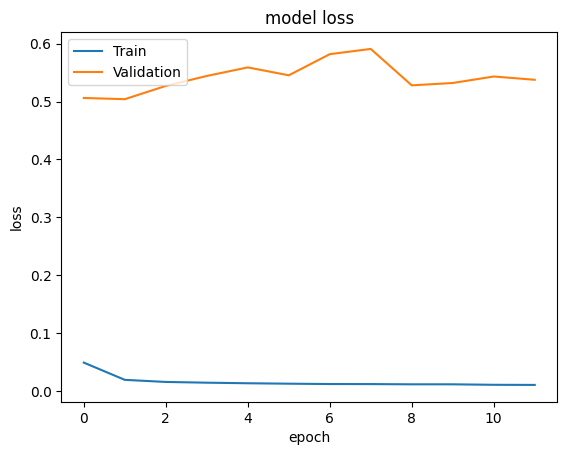

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withref.png')
plt.show()

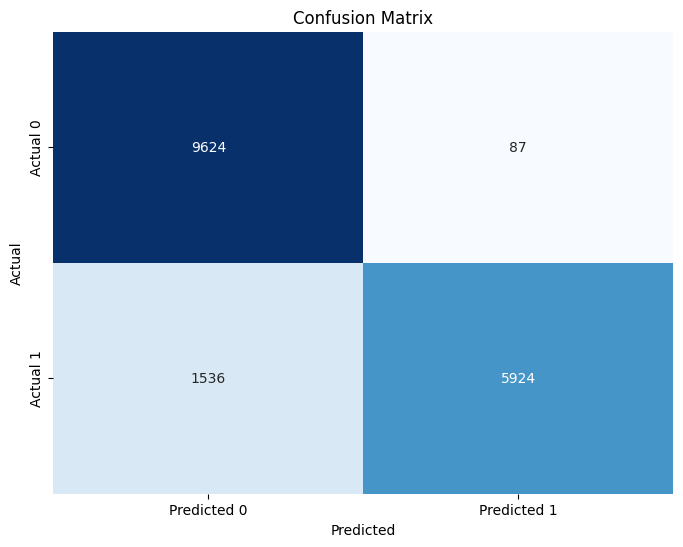

In [166]:
from matplotlib import pylab
from pylab import *
cm = confusion_matrix(Y_DoS_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('heatmap_withref.png')
plt.show()

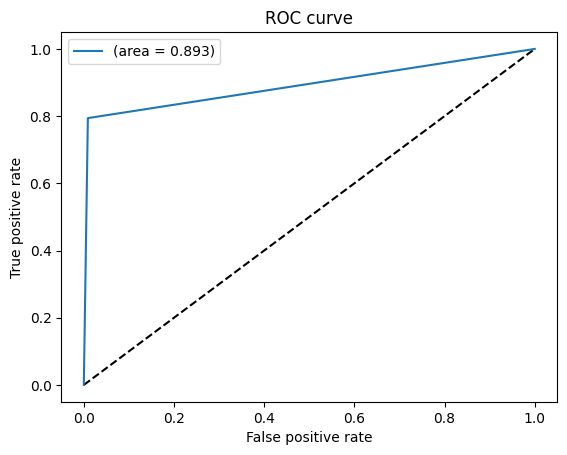

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_withref.png')

plt.show()

Bi-LSTM without ref

In [168]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [169]:
Y_DoS = np.array(Y_DoS)

In [170]:
Y_DoS_test = np.array(Y_DoS_test)

In [171]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bilstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# BiLSTM layer
model.add(Bidirectional(LSTM(units=100, dropout=0.2, return_sequences=False), input_shape=(X_DoS.shape[1], 1)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8540 - loss: 0.3031
Epoch 1: val_accuracy improved from -inf to 0.56555, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8543 - loss: 0.3029 - val_accuracy: 0.5655 - val_loss: 0.8543
Epoch 2/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8738 - loss: 0.3242
Epoch 2: val_accuracy improved from 0.56555 to 0.67824, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8739 - loss: 0.3241 - val_accuracy: 0.6782 - val_loss: 0.6156
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9174 - loss: 0.2552
Epoch 3: val_accuracy did not improve from 0.67824
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9174 - loss: 0.2552 - val_accuracy: 0.5655 - val_loss: 1.1330
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9265 - loss: 0.2093
Epoch 4: val_accuracy did not improve from 0.67824
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9265 - loss: 0.2092 - val_accuracy: 0.6024 - val_loss: 1.0519
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9280 - loss: 0.1983
Epoch 5: val_accuracy did not improve from 0.67824
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9280 - loss: 0.1983 - val_accuracy: 0.5814 - val_loss: 1.2723
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9357 - loss: 0.1830
Epoch 6: val_accuracy d

454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9550 - loss: 0.1330 - val_accuracy: 0.7395 - val_loss: 0.5949
Epoch 11/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9582 - loss: 0.1163
Epoch 11: val_accuracy did not improve from 0.73950
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9582 - loss: 0.1163 - val_accuracy: 0.4644 - val_loss: 1.5306
Epoch 12/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9418 - loss: 0.1354
Epoch 12: val_accuracy did not improve from 0.73950
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9417 - loss: 0.1354 - val_accuracy: 0.2206 - val_loss: 1.8175
Epoch 13/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9096 - loss: 0.1587
Epoch 13: val_accuracy did not improve from 0.73950
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9096 - loss: 0.1587 - val_accuracy: 0.5202 - val_loss: 1.2230
Epoch 14/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9127 - loss: 0.1522
Epoch 14: val_ac

454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9434 - loss: 0.1077 - val_accuracy: 0.8360 - val_loss: 0.5863
Epoch 19/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9351 - loss: 0.1375
Epoch 19: val_accuracy did not improve from 0.83600
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9352 - loss: 0.1374 - val_accuracy: 0.7582 - val_loss: 0.7011
Epoch 20/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9669 - loss: 0.0734
Epoch 20: val_accuracy did not improve from 0.83600
454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9669 - loss: 0.0734 - val_accuracy: 0.7424 - val_loss: 0.5518
Epoch 21/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9619 - loss: 0.0901
Epoch 21: val_accuracy did not improve from 0.83600
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9619 - loss: 0.0901 - val_accuracy: 0.7718 - val_loss: 0.7574
Epoch 22/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9782 - loss: 0.0453
Epoch 22: val_ac

454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9790 - loss: 0.0452 - val_accuracy: 0.8588 - val_loss: 0.7555
Epoch 26/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9803 - loss: 0.0402
Epoch 26: val_accuracy did not improve from 0.85877
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9803 - loss: 0.0402 - val_accuracy: 0.8370 - val_loss: 0.9395
Epoch 27/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9545 - loss: 0.0979
Epoch 27: val_accuracy did not improve from 0.85877
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9544 - loss: 0.0980 - val_accuracy: 0.6344 - val_loss: 0.9369
Epoch 28/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9645 - loss: 0.0817
Epoch 28: val_accuracy did not improve from 0.85877
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9645 - loss: 0.0817 - val_accuracy: 0.7155 - val_loss: 0.8731
Epoch 29/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9734 - loss: 0.0615
Epoch 29: val_ac

454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9789 - loss: 0.0433 - val_accuracy: 0.8599 - val_loss: 0.5584
Epoch 31/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9791 - loss: 0.0370
Epoch 31: val_accuracy did not improve from 0.85994
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9791 - loss: 0.0370 - val_accuracy: 0.8354 - val_loss: 0.8358
Epoch 32/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9746 - loss: 0.0519
Epoch 32: val_accuracy did not improve from 0.85994
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9746 - loss: 0.0520 - val_accuracy: 0.6297 - val_loss: 1.1109
Epoch 33/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9719 - loss: 0.0573
Epoch 33: val_accuracy did not improve from 0.85994
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9719 - loss: 0.0573 - val_accuracy: 0.5262 - val_loss: 1.3280
Epoch 34/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9755 - loss: 0.0492
Epoch 34: val_ac

In [173]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [174]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [175]:
y_pred = np.array(y_pred1)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [176]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73      9711
           1       0.73      0.08      0.15      7460

    accuracy                           0.59     17171
   macro avg       0.66      0.53      0.44     17171
weighted avg       0.65      0.59      0.48     17171



BI-LSTM With ref

In [177]:
X_rfeDoS.shape

(113270, 13, 1)

In [178]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)

In [179]:
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [180]:
X_DoS_test2.shape

(17171, 13, 1)

In [181]:
X_rfeDoS.shape

(113270, 13, 1)

In [182]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bilstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# BiLSTM layer
model.add(Bidirectional(LSTM(units=100, dropout=0.2, return_sequences=False), input_shape=(X_rfeDoS.shape[1], 1)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8998 - loss: 0.2926
Epoch 1: val_accuracy improved from -inf to 0.69629, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9001 - loss: 0.2915 - val_accuracy: 0.6963 - val_loss: 1.0397
Epoch 2/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9706 - loss: 0.0650
Epoch 2: val_accuracy improved from 0.69629 to 0.78831, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9706 - loss: 0.0650 - val_accuracy: 0.7883 - val_loss: 1.0885
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9772 - loss: 0.0496
Epoch 3: val_accuracy improved from 0.78831 to 0.81061, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9772 - loss: 0.0496 - val_accuracy: 0.8106 - val_loss: 1.1510
Epoch 4/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9798 - loss: 0.0421
Epoch 4: val_accuracy improved from 0.81061 to 0.84817, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9798 - loss: 0.0421 - val_accuracy: 0.8482 - val_loss: 1.1816
Epoch 5/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9803 - loss: 0.0382
Epoch 5: val_accuracy improved from 0.84817 to 0.85534, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9803 - loss: 0.0382 - val_accuracy: 0.8553 - val_loss: 0.9979
Epoch 6/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9814 - loss: 0.0365
Epoch 6: val_accuracy did not improve from 0.85534
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9814 - loss: 0.0366 - val_accuracy: 0.8487 - val_loss: 1.2610
Epoch 7/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9817 - loss: 0.0374
Epoch 7: val_accuracy did not improve from 0.85534
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0373 - val_accuracy: 0.8472 - val_loss: 1.1196
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9810 - loss: 0.0356
Epoch 8: val_accuracy did not improve from 0.85534
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9810 - loss: 0.0356 - val_accuracy: 0.8552 - val_loss: 1.1886
Epoch 9/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9800 - loss: 0.0365
Epoch 9: val_accuracy did not impro

454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9825 - loss: 0.0332 - val_accuracy: 0.8582 - val_loss: 1.1643
Epoch 13/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9818 - loss: 0.0342
Epoch 13: val_accuracy did not improve from 0.85825
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9818 - loss: 0.0342 - val_accuracy: 0.8496 - val_loss: 1.4378
Epoch 14/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0337
Epoch 14: val_accuracy improved from 0.85825 to 0.85831, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9809 - loss: 0.0337 - val_accuracy: 0.8583 - val_loss: 1.3497
Epoch 15/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9822 - loss: 0.0334
Epoch 15: val_accuracy did not improve from 0.85831
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9822 - loss: 0.0334 - val_accuracy: 0.8557 - val_loss: 1.1585
Epoch 16/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9816 - loss: 0.0344
Epoch 16: val_accuracy did not improve from 0.85831
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9816 - loss: 0.0343 - val_accuracy: 0.8579 - val_loss: 1.3750
Epoch 17/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9819 - loss: 0.0331
Epoch 17: val_accuracy improved from 0.85831 to 0.86011, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0331 - val_accuracy: 0.8601 - val_loss: 1.1300
Epoch 18/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9811 - loss: 0.0356
Epoch 18: val_accuracy did not improve from 0.86011
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9811 - loss: 0.0355 - val_accuracy: 0.8500 - val_loss: 1.4302
Epoch 19/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9817 - loss: 0.0317
Epoch 19: val_accuracy did not improve from 0.86011
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9817 - loss: 0.0317 - val_accuracy: 0.8527 - val_loss: 1.3148
Epoch 20/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9826 - loss: 0.0321
Epoch 20: val_accuracy did not improve from 0.86011
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9826 - loss: 0.0321 - val_accuracy: 0.8511 - val_loss: 1.4116
Epoch 21/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9819 - loss: 0.0329
Epoch 21: val_accuracy did n

454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9817 - loss: 0.0328 - val_accuracy: 0.8609 - val_loss: 1.3344
Epoch 26/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9816 - loss: 0.0329
Epoch 26: val_accuracy improved from 0.86093 to 0.86506, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9816 - loss: 0.0329 - val_accuracy: 0.8651 - val_loss: 1.0380
Epoch 27/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9825 - loss: 0.0314
Epoch 27: val_accuracy did not improve from 0.86506
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9825 - loss: 0.0314 - val_accuracy: 0.8572 - val_loss: 1.3217
Epoch 28/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9826 - loss: 0.0307
Epoch 28: val_accuracy did not improve from 0.86506
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9826 - loss: 0.0307 - val_accuracy: 0.8640 - val_loss: 1.2445
Epoch 29/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9817 - loss: 0.0317
Epoch 29: val_accuracy improved from 0.86506 to 0.86664, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9817 - loss: 0.0317 - val_accuracy: 0.8666 - val_loss: 1.2085
Epoch 30/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9821 - loss: 0.0314
Epoch 30: val_accuracy did not improve from 0.86664
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9821 - loss: 0.0314 - val_accuracy: 0.8661 - val_loss: 1.2053
Epoch 31/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9827 - loss: 0.0311
Epoch 31: val_accuracy did not improve from 0.86664
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9827 - loss: 0.0311 - val_accuracy: 0.8661 - val_loss: 1.2361
Epoch 32/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9826 - loss: 0.0310
Epoch 32: val_accuracy did not improve from 0.86664
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9826 - loss: 0.0310 - val_accuracy: 0.8481 - val_loss: 1.2735
Epoch 33/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9821 - loss: 0.0317
Epoch 33: val_accuracy did n

454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9820 - loss: 0.0316 - val_accuracy: 0.8690 - val_loss: 1.1716
Epoch 36/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9814 - loss: 0.0318
Epoch 36: val_accuracy did not improve from 0.86897
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9814 - loss: 0.0318 - val_accuracy: 0.8511 - val_loss: 1.3354
Epoch 37/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9818 - loss: 0.0320
Epoch 37: val_accuracy did not improve from 0.86897
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0319 - val_accuracy: 0.8613 - val_loss: 1.3581
Epoch 38/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9832 - loss: 0.0298
Epoch 38: val_accuracy did not improve from 0.86897
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9832 - loss: 0.0298 - val_accuracy: 0.8603 - val_loss: 1.3832
Epoch 39/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9826 - loss: 0.0301
Epoch 39: val_accuracy did n

454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9825 - loss: 0.0308 - val_accuracy: 0.8769 - val_loss: 1.0442
Epoch 44/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9827 - loss: 0.0299
Epoch 44: val_accuracy did not improve from 0.87689
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9827 - loss: 0.0299 - val_accuracy: 0.8631 - val_loss: 1.1943
Epoch 45/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9829 - loss: 0.0302
Epoch 45: val_accuracy did not improve from 0.87689
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9829 - loss: 0.0302 - val_accuracy: 0.8606 - val_loss: 1.2722
Epoch 46/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9821 - loss: 0.0312
Epoch 46: val_accuracy did not improve from 0.87689
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9821 - loss: 0.0312 - val_accuracy: 0.8676 - val_loss: 1.2298
Epoch 47/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9820 - loss: 0.0309
Epoch 47: val_accuracy did n

In [184]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 200)            │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,405 (958.62 KB)

 Trainable params: 81,801 (319.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,604 (639.08 KB)

In [185]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [186]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [187]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [188]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      9711
           1       0.96      0.72      0.82      7460

    accuracy                           0.87     17171
   macro avg       0.89      0.85      0.86     17171
weighted avg       0.88      0.87      0.86     17171



GRU without ref

In [189]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [190]:
Y_DoS = np.array(Y_DoS)

In [191]:
Y_DoS_test = np.array(Y_DoS_test)

In [192]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/gruk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# GRU layers
model.add(GRU(units=64, dropout=0.2, return_sequences=True, input_shape=(X_DoS.shape[1], 1)))
model.add(GRU(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8665 - loss: 0.3367
Epoch 1: val_accuracy improved from -inf to 0.55763, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8666 - loss: 0.3362 - val_accuracy: 0.5576 - val_loss: 1.8369
Epoch 2/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9076 - loss: 0.1804
Epoch 2: val_accuracy did not improve from 0.55763
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9076 - loss: 0.1803 - val_accuracy: 0.5271 - val_loss: 2.1017
Epoch 3/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9113 - loss: 0.1659
Epoch 3: val_accuracy improved from 0.55763 to 0.57021, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9113 - loss: 0.1659 - val_accuracy: 0.5702 - val_loss: 1.4758
Epoch 4/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9137 - loss: 0.1550
Epoch 4: val_accuracy improved from 0.57021 to 0.57667, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9137 - loss: 0.1550 - val_accuracy: 0.5767 - val_loss: 1.5015
Epoch 5/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9138 - loss: 0.1545
Epoch 5: val_accuracy did not improve from 0.57667
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9138 - loss: 0.1545 - val_accuracy: 0.4828 - val_loss: 3.6286
Epoch 6/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8663 - loss: 0.3023
Epoch 6: val_accuracy did not improve from 0.57667
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8664 - loss: 0.3019 - val_accuracy: 0.4204 - val_loss: 1.3750
Epoch 7/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9111 - loss: 0.1637
Epoch 7: val_accuracy improved from 0.57667 to 0.64510, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9111 - loss: 0.1637 - val_accuracy: 0.6451 - val_loss: 1.3865
Epoch 8/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9144 - loss: 0.1553
Epoch 8: val_accuracy did not improve from 0.64510
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9144 - loss: 0.1553 - val_accuracy: 0.4756 - val_loss: 2.0135
Epoch 9/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9147 - loss: 0.1506
Epoch 9: val_accuracy did not improve from 0.64510
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9147 - loss: 0.1506 - val_accuracy: 0.6309 - val_loss: 1.5578
Epoch 10/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9148 - loss: 0.1519
Epoch 10: val_accuracy did not improve from 0.64510
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9147 - loss: 0.1519 - val_accuracy: 0.6282 - val_loss: 1.5369
Epoch 11/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9146 - loss: 0.1496
Epoch 11: val_accuracy d

454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9172 - loss: 0.1429 - val_accuracy: 0.6485 - val_loss: 1.4259
Epoch 19/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9180 - loss: 0.1426
Epoch 19: val_accuracy did not improve from 0.64854
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9180 - loss: 0.1426 - val_accuracy: 0.6277 - val_loss: 1.5406
Epoch 20/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9188 - loss: 0.1399
Epoch 20: val_accuracy did not improve from 0.64854
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9188 - loss: 0.1399 - val_accuracy: 0.6180 - val_loss: 1.6336
Epoch 21/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9195 - loss: 0.1377
Epoch 21: val_accuracy did not improve from 0.64854
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9195 - loss: 0.1378 - val_accuracy: 0.6450 - val_loss: 0.9060
Epoch 22/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9157 - loss: 0.1498
Epoch 22: val_accura

454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9157 - loss: 0.1498 - val_accuracy: 0.6500 - val_loss: 1.1875
Epoch 23/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9189 - loss: 0.1402
Epoch 23: val_accuracy did not improve from 0.64999
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9189 - loss: 0.1402 - val_accuracy: 0.6134 - val_loss: 1.3610
Epoch 24/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9194 - loss: 0.1363
Epoch 24: val_accuracy did not improve from 0.64999
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9194 - loss: 0.1363 - val_accuracy: 0.6301 - val_loss: 1.0413
Epoch 25/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9176 - loss: 0.1401
Epoch 25: val_accuracy improved from 0.64999 to 0.66106, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9177 - loss: 0.1401 - val_accuracy: 0.6611 - val_loss: 1.0750
Epoch 26/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9185 - loss: 0.1393
Epoch 26: val_accuracy did not improve from 0.66106
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9185 - loss: 0.1393 - val_accuracy: 0.6419 - val_loss: 1.1967
Epoch 27/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9184 - loss: 0.1375
Epoch 27: val_accuracy did not improve from 0.66106
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9184 - loss: 0.1375 - val_accuracy: 0.6527 - val_loss: 1.1590
Epoch 28/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9174 - loss: 0.1416
Epoch 28: val_accuracy did not improve from 0.66106
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9174 - loss: 0.1416 - val_accuracy: 0.5366 - val_loss: 1.4540
Epoch 29/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9193 - loss: 0.1377
Epoch 29: val_accura

454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9193 - loss: 0.1377 - val_accuracy: 0.6623 - val_loss: 1.1663
Epoch 30/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9185 - loss: 0.1390
Epoch 30: val_accuracy did not improve from 0.66228
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9185 - loss: 0.1390 - val_accuracy: 0.4584 - val_loss: 1.3534
Epoch 31/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9150 - loss: 0.1428
Epoch 31: val_accuracy did not improve from 0.66228
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9150 - loss: 0.1428 - val_accuracy: 0.5891 - val_loss: 1.0621
Epoch 32/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9193 - loss: 0.1377
Epoch 32: val_accuracy improved from 0.66228 to 0.67084, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9193 - loss: 0.1377 - val_accuracy: 0.6708 - val_loss: 1.1074
Epoch 33/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9201 - loss: 0.1363
Epoch 33: val_accuracy did not improve from 0.67084
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9201 - loss: 0.1363 - val_accuracy: 0.5629 - val_loss: 1.0290
Epoch 34/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9170 - loss: 0.1398
Epoch 34: val_accuracy did not improve from 0.67084
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9170 - loss: 0.1398 - val_accuracy: 0.5644 - val_loss: 1.1900
Epoch 35/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9188 - loss: 0.1370
Epoch 35: val_accuracy did not improve from 0.67084
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9188 - loss: 0.1370 - val_accuracy: 0.5964 - val_loss: 0.9586
Epoch 36/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9186 - loss: 0.1375
Epoch 36: val_accura

454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9186 - loss: 0.1375 - val_accuracy: 0.7485 - val_loss: 0.7072
Epoch 37/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9187 - loss: 0.1390
Epoch 37: val_accuracy did not improve from 0.74847
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9187 - loss: 0.1390 - val_accuracy: 0.6551 - val_loss: 0.9988
Epoch 38/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9184 - loss: 0.1390
Epoch 38: val_accuracy did not improve from 0.74847
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9184 - loss: 0.1390 - val_accuracy: 0.6933 - val_loss: 1.1330
Epoch 39/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9172 - loss: 0.1400
Epoch 39: val_accuracy did not improve from 0.74847
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9172 - loss: 0.1400 - val_accuracy: 0.4459 - val_loss: 1.5615
Epoch 40/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9192 - loss: 0.1353
Epoch 40: val_accura

In [194]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [195]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [196]:
y_pred = np.array(y_pred1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [197]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70      9711
           1       0.43      0.10      0.16      7460

    accuracy                           0.55     17171
   macro avg       0.50      0.50      0.43     17171
weighted avg       0.51      0.55      0.46     17171



GRU with ref

In [198]:
X_rfeDoS.shape

(113270, 13, 1)

In [199]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [200]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/grukref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# GRU layers
model.add(GRU(units=64, dropout=0.2, return_sequences=True, input_shape=(X_rfeDoS.shape[1], 1)))
model.add(GRU(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8528 - loss: 0.3235
Epoch 1: val_accuracy improved from -inf to 0.85778, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8535 - loss: 0.3216 - val_accuracy: 0.8578 - val_loss: 0.7743
Epoch 2/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9132 - loss: 0.1522
Epoch 2: val_accuracy improved from 0.85778 to 0.87619, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9132 - loss: 0.1521 - val_accuracy: 0.8762 - val_loss: 0.5834
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9158 - loss: 0.1454
Epoch 3: val_accuracy did not improve from 0.87619
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9158 - loss: 0.1454 - val_accuracy: 0.8636 - val_loss: 0.9258
Epoch 4/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9163 - loss: 0.1425
Epoch 4: val_accuracy did not improve from 0.87619
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9163 - loss: 0.1425 - val_accuracy: 0.8545 - val_loss: 0.9232
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9156 - loss: 0.1420
Epoch 5: val_accuracy did not improve from 0.87619
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9156 - loss: 0.1420 - val_accuracy: 0.8582 - val_loss: 0.8464
Epoch 6/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9186 - loss: 0.1380
Epoch 6: val_accuracy did not impro

454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9198 - loss: 0.1368 - val_accuracy: 0.8820 - val_loss: 0.9014
Epoch 18/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9174 - loss: 0.1380
Epoch 18: val_accuracy improved from 0.88195 to 0.88987, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9174 - loss: 0.1380 - val_accuracy: 0.8899 - val_loss: 0.9392
Epoch 19/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9171 - loss: 0.1387
Epoch 19: val_accuracy did not improve from 0.88987
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9171 - loss: 0.1387 - val_accuracy: 0.8751 - val_loss: 1.0486
Epoch 20/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9187 - loss: 0.1378
Epoch 20: val_accuracy did not improve from 0.88987
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9187 - loss: 0.1378 - val_accuracy: 0.8666 - val_loss: 1.0811
Epoch 21/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9186 - loss: 0.1374
Epoch 21: val_accuracy did not improve from 0.88987
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9186 - loss: 0.1374 - val_accuracy: 0.8694 - val_loss: 1.0616
Epoch 22/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9192 - loss: 0.1364
Epoch 22: val_accuracy did n

In [202]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [203]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [204]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      9711
           1       0.98      0.71      0.82      7460

    accuracy                           0.87     17171
   macro avg       0.90      0.85      0.86     17171
weighted avg       0.89      0.87      0.86     17171



BiGRU without ref

In [206]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [207]:
Y_DoS = np.array(Y_DoS)

In [208]:
Y_DoS_test = np.array(Y_DoS_test)

In [209]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bigruk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# Bidirectional GRU layers
model.add(Bidirectional(GRU(units=64, dropout=0.2, return_sequences=True), input_shape=(X_DoS.shape[1], 1)))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=False)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9193 - loss: 0.2174
Epoch 1: val_accuracy improved from -inf to 0.86279, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9194 - loss: 0.2172 - val_accuracy: 0.8628 - val_loss: 0.4708
Epoch 2/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9765 - loss: 0.0509
Epoch 2: val_accuracy did not improve from 0.86279
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9765 - loss: 0.0508 - val_accuracy: 0.8532 - val_loss: 0.7315
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9788 - loss: 0.0408
Epoch 3: val_accuracy improved from 0.86279 to 0.87881, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9788 - loss: 0.0408 - val_accuracy: 0.8788 - val_loss: 0.8338
Epoch 4/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9808 - loss: 0.0363
Epoch 4: val_accuracy improved from 0.87881 to 0.89191, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9808 - loss: 0.0363 - val_accuracy: 0.8919 - val_loss: 0.6481
Epoch 5/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9813 - loss: 0.0344
Epoch 5: val_accuracy did not improve from 0.89191
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9813 - loss: 0.0344 - val_accuracy: 0.8870 - val_loss: 0.7623
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9763 - loss: 0.0515
Epoch 6: val_accuracy improved from 0.89191 to 0.90152, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9763 - loss: 0.0515 - val_accuracy: 0.9015 - val_loss: 0.7270
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9803 - loss: 0.0337
Epoch 7: val_accuracy did not improve from 0.90152
454/454 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9803 - loss: 0.0337 - val_accuracy: 0.9003 - val_loss: 0.7388
Epoch 8/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9813 - loss: 0.0329
Epoch 8: val_accuracy did not improve from 0.90152
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9813 - loss: 0.0329 - val_accuracy: 0.8985 - val_loss: 0.7227
Epoch 9/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9794 - loss: 0.0327
Epoch 9: val_accuracy improved from 0.90152 to 0.90164, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9794 - loss: 0.0327 - val_accuracy: 0.9016 - val_loss: 0.7511
Epoch 10/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9811 - loss: 0.0314
Epoch 10: val_accuracy did not improve from 0.90164
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9811 - loss: 0.0314 - val_accuracy: 0.8970 - val_loss: 0.7333
Epoch 11/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9803 - loss: 0.0350
Epoch 11: val_accuracy did not improve from 0.90164
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9803 - loss: 0.0350 - val_accuracy: 0.9006 - val_loss: 0.7783
Epoch 12/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9818 - loss: 0.0314
Epoch 12: val_accuracy did not improve from 0.90164
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9818 - loss: 0.0314 - val_accuracy: 0.9000 - val_loss: 0.7042
Epoch 13/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9827 - loss: 0.0297
Epoch 13: val_ac

454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9814 - loss: 0.0311 - val_accuracy: 0.9105 - val_loss: 0.6738
Epoch 16/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9822 - loss: 0.0302
Epoch 16: val_accuracy did not improve from 0.91055
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9822 - loss: 0.0302 - val_accuracy: 0.8836 - val_loss: 0.7551
Epoch 17/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9793 - loss: 0.0384
Epoch 17: val_accuracy did not improve from 0.91055
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9793 - loss: 0.0384 - val_accuracy: 0.9088 - val_loss: 0.7535
Epoch 18/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9828 - loss: 0.0290
Epoch 18: val_accuracy did not improve from 0.91055
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9828 - loss: 0.0290 - val_accuracy: 0.9093 - val_loss: 0.8298
Epoch 19/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9828 - loss: 0.0295
Epoch 19: val_ac

In [211]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


In [212]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [213]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [214]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      9711
           1       0.99      0.76      0.86      7460

    accuracy                           0.89     17171
   macro avg       0.92      0.88      0.89     17171
weighted avg       0.91      0.89      0.89     17171



BIGRU with ref

In [215]:
X_rfeDoS.shape

(113270, 13, 1)

In [216]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [217]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bigrukref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# Bidirectional GRU layers
model.add(Bidirectional(GRU(units=64, dropout=0.2, return_sequences=True), input_shape=(X_rfeDoS.shape[1], 1)))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=False)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9203 - loss: 0.1973
Epoch 1: val_accuracy improved from -inf to 0.85027, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9208 - loss: 0.1962 - val_accuracy: 0.8503 - val_loss: 0.6944
Epoch 2/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9788 - loss: 0.0410
Epoch 2: val_accuracy did not improve from 0.85027
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9788 - loss: 0.0410 - val_accuracy: 0.8502 - val_loss: 0.8982
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9810 - loss: 0.0390
Epoch 3: val_accuracy improved from 0.85027 to 0.86029, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9810 - loss: 0.0390 - val_accuracy: 0.8603 - val_loss: 0.8128
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9809 - loss: 0.0353
Epoch 4: val_accuracy did not improve from 0.86029
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9809 - loss: 0.0353 - val_accuracy: 0.8564 - val_loss: 0.7018
Epoch 5/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9810 - loss: 0.0346
Epoch 5: val_accuracy improved from 0.86029 to 0.88026, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9810 - loss: 0.0346 - val_accuracy: 0.8803 - val_loss: 0.6485
Epoch 6/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9810 - loss: 0.0345
Epoch 6: val_accuracy did not improve from 0.88026
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9810 - loss: 0.0345 - val_accuracy: 0.8572 - val_loss: 0.8090
Epoch 7/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9827 - loss: 0.0319
Epoch 7: val_accuracy did not improve from 0.88026
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9827 - loss: 0.0319 - val_accuracy: 0.8596 - val_loss: 0.8037
Epoch 8/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9813 - loss: 0.0345
Epoch 8: val_accuracy did not improve from 0.88026
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9813 - loss: 0.0345 - val_accuracy: 0.8671 - val_loss: 0.7143
Epoch 9/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9818 - loss: 0.0332
Epoch 9: val_accuracy did no

454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9817 - loss: 0.0313 - val_accuracy: 0.8842 - val_loss: 0.6790
Epoch 17/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9804 - loss: 0.0324
Epoch 17: val_accuracy did not improve from 0.88422
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9804 - loss: 0.0324 - val_accuracy: 0.8707 - val_loss: 0.8252
Epoch 18/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9831 - loss: 0.0297
Epoch 18: val_accuracy did not improve from 0.88422
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9831 - loss: 0.0297 - val_accuracy: 0.8587 - val_loss: 0.7602
Epoch 19/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9830 - loss: 0.0301
Epoch 19: val_accuracy did not improve from 0.88422
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9830 - loss: 0.0301 - val_accuracy: 0.8624 - val_loss: 0.7576
Epoch 20/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9822 - loss: 0.0310
Epoch 20: val_accu

454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9831 - loss: 0.0309 - val_accuracy: 0.8893 - val_loss: 0.6432
Epoch 28/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9823 - loss: 0.0310
Epoch 28: val_accuracy did not improve from 0.88935
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9823 - loss: 0.0310 - val_accuracy: 0.8765 - val_loss: 0.8042
Epoch 29/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9823 - loss: 0.0311
Epoch 29: val_accuracy improved from 0.88935 to 0.91713, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9823 - loss: 0.0311 - val_accuracy: 0.9171 - val_loss: 0.5498
Epoch 30/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9825 - loss: 0.0307
Epoch 30: val_accuracy did not improve from 0.91713
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9825 - loss: 0.0307 - val_accuracy: 0.8924 - val_loss: 0.6477
Epoch 31/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9823 - loss: 0.0295
Epoch 31: val_accuracy did not improve from 0.91713
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9823 - loss: 0.0295 - val_accuracy: 0.8807 - val_loss: 0.6367
Epoch 32/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9835 - loss: 0.0307
Epoch 32: val_accuracy did not improve from 0.91713
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9835 - loss: 0.0307 - val_accuracy: 0.8792 - val_loss: 0.7001
Epoch 33/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9833 - loss: 0.0294
Epoch 33: val_accurac

In [219]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [220]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [221]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [222]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      9711
           1       0.98      0.73      0.84      7460

    accuracy                           0.88     17171
   macro avg       0.91      0.86      0.87     17171
weighted avg       0.90      0.88      0.87     17171



LSTM without ref

In [223]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [224]:
Y_DoS = np.array(Y_DoS)

In [225]:
Y_DoS_test = np.array(Y_DoS_test)

In [226]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/lstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_DoS.shape[1], 1)))
model.add(LSTM(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8239 - loss: 0.3566
Epoch 1: val_accuracy improved from -inf to 0.20238, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8242 - loss: 0.3560 - val_accuracy: 0.2024 - val_loss: 3.3893
Epoch 2/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9057 - loss: 0.1760
Epoch 2: val_accuracy improved from 0.20238 to 0.21350, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9057 - loss: 0.1760 - val_accuracy: 0.2135 - val_loss: 4.3923
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9100 - loss: 0.1636
Epoch 3: val_accuracy did not improve from 0.21350
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9100 - loss: 0.1636 - val_accuracy: 0.1938 - val_loss: 3.4209
Epoch 4/50
400/454 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9126 - loss: 0.1555

In [ ]:
y_pred = model.predict(X_DoS_test)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

LSTM with ref

In [ ]:
X_rfeDoS.shape

In [ ]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [ ]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/lstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_rfeDoS.shape[1], 1)))
model.add(LSTM(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

In [ ]:
y_pred = model.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

Ensembling with ref

In [ ]:
from keras.models import load_model
ann_ref = load_model('/content/drive/MyDrive/check/ANN1ref_intrusion.h5')

In [ ]:
y_pred = ann_ref.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

In [ ]:
ann_ref.summary()

In [ ]:
from keras.models import load_model
cnnlstm_ref = load_model('/content/drive/MyDrive/check/cnnlstmkref_intrusion.h5')

In [ ]:
y_pred = cnnlstm_ref.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

In [ ]:
from keras.models import load_model
BIlstm_ref = load_model('/content/drive/MyDrive/check/bilstmkref_intrusion.h5')

In [ ]:
y_pred = BIlstm_ref.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

In [ ]:
from keras.models import load_model
gru_ref = load_model('/content/drive/MyDrive/check/grukref_intrusion.h5')

In [ ]:
y_pred = gru_ref.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

In [ ]:
from keras.models import load_model
bigru_ref = load_model('/content/drive/MyDrive/check/bigrukref_intrusion.h5')

In [ ]:
y_pred = bigru_ref.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

In [ ]:
from keras.models import load_model
lstm_ref = load_model('/content/drive/MyDrive/check/lstmkref_intrusion.h5')

In [ ]:
y_pred = lstm_ref.predict(X_DoS_test2)

In [ ]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
y_pred = np.array(y_pred1)
y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

In [ ]:
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]

In [ ]:
preds = [model.predict(X_DoS_test2) for model in models]

In [ ]:
preds

In [ ]:
import numpy as np

# Assuming you have a list of prediction arrays like 'preds'
# preds = [model.predict(X_DoS_test2) for model in models]

# Define the threshold value
threshold = 0.5

# Apply the threshold to each prediction array
thresholded_preds = [np.where(pred >= threshold, 1, 0) for pred in preds]

# 'thresholded_preds' now contains the thresholded predictions for each model

In [ ]:
thresholded_preds

In [ ]:
preds=np.array(thresholded_preds)
summed = np.sum(preds, axis=0)

In [ ]:
ensemble_prediction = np.argmax(summed, axis=1)

In [ ]:
predict_x=ann_ref.predict(X_DoS_test2)
prediction1=np.argmax(predict_x,axis=1)

In [ ]:
predict_x=cnnlstm_ref.predict(X_DoS_test2)
prediction2=np.argmax(predict_x,axis=1)

In [ ]:
predict_x=BIlstm_ref.predict(X_DoS_test2)
prediction3=np.argmax(predict_x,axis=1)

In [ ]:
predict_x=gru_ref.predict(X_DoS_test2)
prediction4=np.argmax(predict_x,axis=1)

In [ ]:
predict_x=bigru_ref.predict(X_DoS_test2)
prediction5=np.argmax(predict_x,axis=1)

In [ ]:
predict_x=lstm_ref.predict(X_DoS_test2)
prediction6=np.argmax(predict_x,axis=1)

In [ ]:
accuracy1 = accuracy_score(Y_DoS_test, prediction1)
accuracy2 = accuracy_score(Y_DoS_test, prediction2)
accuracy3 = accuracy_score(Y_DoS_test, prediction3)
accuracy4 = accuracy_score(Y_DoS_test, prediction4)
accuracy5 = accuracy_score(Y_DoS_test, prediction5)
accuracy6 = accuracy_score(Y_DoS_test, prediction6)

ensemble_accuracy = accuracy_score(Y_DoS_test, ensemble_prediction)

In [ ]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

In [ ]:
#Weighted average ensemble
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
preds = [model.predict(X_DoS_test2) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4,0.2,0.4,0.2]

In [ ]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)


In [ ]:
weighted_accuracy = accuracy_score(Y_DoS_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

In [ ]:
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
preds = [model.predict(X_DoS_test2) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4,0.2,0.4,0.2]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0, 5):
        for w3 in range(0, 5):
            for w4 in range(0, 5):
                for w5 in range(0, 5):
                    for w6 in range(0, 5):
                        wts = [w1/10., w2/10., w3/10., w4/10., w5/10., w6/10.]
                        wted_preds1 = np.tensordot(preds, wts, axes=((0),(0)))
                        wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
                        weighted_accuracy = accuracy_score(Y_DoS_test, wted_ensemble_pred)

                        new_row = pd.DataFrame({'wt1': wts[0], 'wt2': wts[1], 'wt3': wts[2], 'wt4': wts[3], 'wt5': wts[4], 'wt6': wts[5], 'acc': weighted_accuracy*100}, index=[0])
                        df = pd.concat([df, new_row], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of", max_acc_row['acc'], "obtained with weights:",
      "wt1 =", max_acc_row['wt1'], "wt2 =", max_acc_row['wt2'],
      "wt3 =", max_acc_row['wt3'], "wt4 =", max_acc_row['wt4'],
      "wt5 =", max_acc_row['wt5'], "wt6 =", max_acc_row['wt6'])


In [ ]:
import numpy as np

# Initialize an empty array to store the ensemble predictions
num_classes = 2  # Adjust as per your problem
ensemble_predictions = np.zeros((len(X_DoS_test2), num_classes))

# Make predictions with each model and add them to the ensemble_predictions
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
for model in models:
    model_predictions = model.predict(X_DoS_test2)
    ensemble_predictions += model_predictions

# Average the predictions from all models
average_predictions = ensemble_predictions / len(models)

# The 'average_predictions' now contains the ensembled results.

# You can use 'average_predictions' for further analysis or evaluation.
# For example, if you are working with classification, you can get the final class predictions using argmax:
final_predictions = np.argmax(average_predictions, axis=1)

# Now, 'final_predictions' contains the ensemble's class predictions for your test data.


In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define functions to create and compile your Keras models
def create_ann_model():
    model = ann_ref  # Replace with your actual Keras model
    return model

def create_cnnlstm_model():
    model = cnnlstm_ref  # Replace with your actual Keras model
    return model

# def create_BIlstm_model():
#     model = BIlstm_ref  # Replace with your actual Keras model
#     return model

# def create_gru_model():
#     model = gru_ref  # Replace with your actual Keras model
#     return model

# def create_bigru_model():
#     model = bigru_ref  # Replace with your actual Keras model
#     return model

# def create_lstm_model():
#     model = lstm_ref  # Replace with your actual Keras model
#     return model


In [ ]:
# Create KerasClassifier instances for each Keras model
ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=5, batch_size=128)
cnnlstm_classifier = KerasClassifier(build_fn=create_cnnlstm_model, epochs=5, batch_size=128)
# BIlstm_classifier = KerasClassifier(build_fn=create_BIlstm_model, epochs=5, batch_size=128)
# gru_classifier = KerasClassifier(build_fn=create_gru_model, epochs=5, batch_size=128)
# bigru_classifier = KerasClassifier(build_fn=create_bigru_model, epochs=5, batch_size=128)
# lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=128)

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('ann', ann_classifier),
    ('cnnlstm', cnnlstm_classifier),
    # ('BIlstm', BIlstm_classifier),
    # ('gru', gru_classifier),
    # ('bigru', bigru_classifier),
    # ('lstm', lstm_classifier)
], voting='soft',weights=[2, 2])

In [ ]:
voting_classifier.fit(X_rfeDoS, Y_DoS)

In [ ]:
ensemble_predictions = voting_classifier.predict(X_DoS_test2)

In [ ]:
ensemble_predictions

In [ ]:
accuracy = accuracy_score(Y_DoS_test, ensemble_predictions)

In [ ]:
accuracy

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
meta_classifier = RandomForestClassifier()

In [ ]:
base_classifiers = [
    ('ann', ann_classifier),
    ('cnnlstm', cnnlstm_classifier),
    ('BIlstm', BIlstm_classifier),
    ('gru', gru_classifier),
    ('bigru', bigru_classifier),
    ('lstm', lstm_classifier)
]

In [ ]:
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

In [ ]:
stacking_classifier.fit(X_rfeDoS, Y_DoS)

In [ ]:
stacking_predictions = stacking_classifier.predict(X_DoS_test2)

In [ ]:
stacking_predictions

In [ ]:
accuracy = accuracy_score(Y_DoS_test, stacking_predictions)

In [ ]:
accuracy